This code generates mixed samples from 20 IGFR Samples

In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
import matplotlib as mpl
from scipy import linalg
from scipy import misc
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import genfromtxt
from sklearn import mixture
from pylab import *
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd

from itertools import cycle, islice
import pandas
np.random.seed(2)

In [2]:
# X has 20 original samples
X_orig = []
for i in range(20):
    Orig_data = np.genfromtxt('../20samples Original/Sample%s.csv' %(i+1), delimiter=',')
    #Orig_data = np.reshape(Orig_data,(1,201000))
    X_orig.append(Orig_data)
X_orig = np.array(X_orig)
Ex = np.genfromtxt('../20samples Original/Ex.csv', delimiter=',')
Em = np.genfromtxt('../20samples Original/Em.csv', delimiter=',')
Orig_labels = np.genfromtxt('../20labels Original/GCMS20samples.csv', delimiter=',')

In [3]:
# Importing Woodsmoke and Diesel Samples

test_files = pd.read_excel('../../Manuscript 2/6labels Original/TestSamplesData.xlsx')
test_eem_data = np.zeros((test_files.shape[0],1000,201))

j=0
for file in test_files['filename'].to_list():
    test_eem_data[j,:,:] = np.genfromtxt("../../Manuscript 2/6samples Original/" + file, dtype=float, delimiter=',') 
    j=j+1
    
test_ex = np.genfromtxt("../../Manuscript 2/6samples Original/ex_woodsmoke.csv", dtype=float, delimiter=',')
test_em = np.genfromtxt("../../Manuscript 2/6samples Original/em_woodsmoke.csv", dtype=float, delimiter=',')

In [4]:
def em_interpolation(eem):
    intp_eem = np.zeros(eem.shape)
    intp_eem[8:,:] = eem[:-8,:]
    return intp_eem

In [5]:
for j in range(test_eem_data.shape[0]):
    test_eem_data[j,:,:] = em_interpolation(test_eem_data[j,:,:])

In [6]:
# Importing GCMS data for test samples

test_GCMS_diesel_data = pd.read_csv("../GCMS Data/GCMS_diesel.csv", delimiter=',')
test_GCMS_woodsmoke_data = pd.read_csv("../GCMS Data/GCMS_woodsmoke.csv", delimiter=',')
test_GCMS_data = pd.concat([test_GCMS_diesel_data, test_GCMS_woodsmoke_data])


In [7]:
# Left Join GCMS data on samples data 
test_GCMS_data_merged = test_files.join(test_GCMS_data.set_index('Sample ID'),
                 on='Sample ID', 
                 how='left')

In [8]:
Y_test = np.zeros((test_GCMS_data_merged.shape[0],16))
Y_test[:,:] = np.array(test_GCMS_data_merged.iloc[:,4:])

In [9]:
def makspool(data, size_x, size_y, stride_x, stride_y):
    data_torch = torch.from_numpy(data)
    max_pooled = nn.MaxPool2d((size_x,size_y),stride=(stride_x, stride_y))
    output = max_pooled(data_torch)
    return output.numpy()

In [10]:
X_test_down = makspool(test_eem_data, 10,6,10,6)

In [11]:
X_test_down.shape

(6, 100, 33)

In [12]:
X_orig_downsampled = makspool(X_orig, 10,6,10,6)

In [13]:
np.savetxt("x_orig_downsampled.csv", np.reshape(X_orig_downsampled, (20, 3300)), delimiter=',')

In [14]:
X_train_down = X_orig_downsampled
Y_train = Orig_labels

In [15]:

X_train_new = []
Y_train_new = []
for i in range(580):
    rand_im = np.random.randint(0,19,3)
    rand = np.random.uniform(0.133,2.33,3)
    new_image = np.zeros(np.shape(X_train_down[0]))
    new_label = np.zeros(np.shape(Y_train[0]))
    for j in range(3):
        new_image = new_image + X_train_down[rand_im[j]] * rand[j]
        new_label = new_label + Y_train[rand_im[j]] * rand[j]
    new_image = new_image + np.random.normal(0, 0.01, np.shape(new_image))
    X_train_new.append(new_image)
    Y_train_new.append(new_label)
X_train_new = np.array(X_train_new)
Y_train_new = np.array(Y_train_new)

In [22]:

X_test_new = []
Y_test_new = []
for i in range(144):
    rand_im = np.random.randint(0,6,3)
    rand = np.random.uniform(0.133,2.33,3)
    new_image = np.zeros(np.shape(X_test_down[0]))
    new_label = np.zeros(np.shape(Y_test[0]))
    for j in range(3):
        new_image = new_image + X_test_down[rand_im[j]] * rand[j]
        new_label = new_label + Y_test[rand_im[j]] * rand[j]
    new_image = new_image + np.random.normal(0, 0.01, np.shape(new_image))
    X_test_new.append(new_image)
    Y_test_new.append(new_label)
X_test_new = np.array(X_test_new)
Y_test_new = np.array(Y_test_new)

In [23]:
X_train_new.shape

(580, 100, 33)

In [24]:
Y_train_new.shape

(580, 16)

In [25]:
X_test_new.shape

(144, 100, 33)

In [26]:
Y_test_new.shape

(144, 16)

In [27]:
Ex = np.genfromtxt('../20samples Original/Ex.csv', dtype=float, delimiter=',')
Em = np.genfromtxt('../20samples Original/Em.csv', dtype=float, delimiter=',')
import pandas
df = pandas.read_csv('../20labels Original/PAHs.csv')
index_col='Acronyms'
leg = df[index_col][:16]
lst = list(leg)

In [28]:
fsize = 33
n = int(np.around(Ex.size/fsize))
Ex_new = zeros(fsize)
for i in range(fsize):
    Ex_new[i] = np.mean(Ex[i*n+1:(i+1)*n])
    
fsize = 100
n = int(np.around(Em.size/fsize))
Em_new = zeros(fsize)
for i in range(fsize):
    Em_new[i] = np.mean(Em[i*n+1:(i+1)*n])

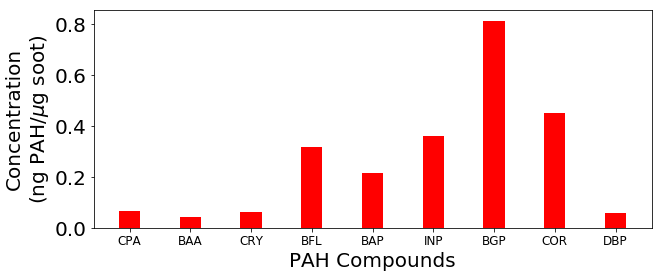

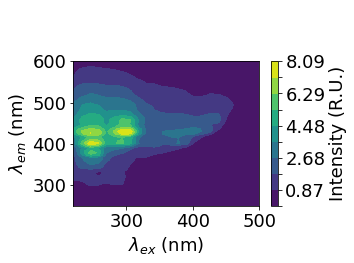

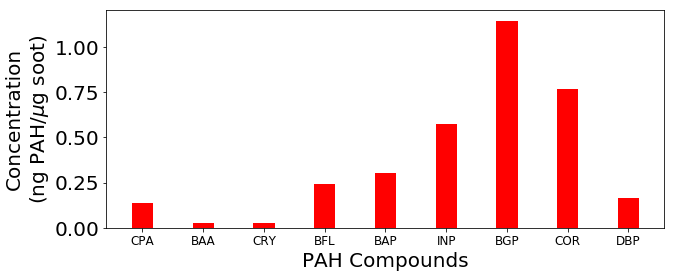

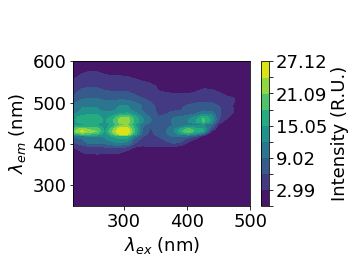

In [31]:
import matplotlib.ticker as ticker

def myfmt(x, pos):
    return '{0:.2f}'.format(x)

for i in range(2):
    f2 = plt.figure(figsize=(10,4))
    ax = f2.add_subplot(1,1,1)
    df2 = ax.bar(np.arange(9),Y_train_new[i][7:],0.35,color='red',label='Test Samples Original')
    ax.set_ylabel('Concentration\n(ng PAH/$\mu$g soot)',fontsize=20)
    ax.set_xlabel('PAH Compounds',fontsize=20)
    ax.set_xticks(np.arange(9))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xticklabels(lst[7:])
    ax.set_title('',fontsize=20)
    f2.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke Data Augmentation\\GCMSAugtrain%s.png' %i,bbox_inches='tight')
    
    f5 = plt.figure(figsize=(4.8,3.6))
    levels=linspace(np.min(X_train_new[i]),np.max(X_train_new[i]),10)
    ax = f5.add_subplot(1,1,1)
    eem = X_train_new[i]
    cont = ax.contourf(Ex_new,Em_new,eem,levels)
    ax.set_xlim([220,500])
    ax.set_ylim([250,600])
    ttl = ax.set_title(" ",fontsize=54,
                       #fontweight='bold'
                     )
    ttl.set_position([0.55, 1.05])
    ax.set_ylabel('$\lambda_{em}$ (nm)',fontsize=18)
    ax.set_xlabel('$\lambda_{ex}$ (nm)',fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = f5.colorbar(cont, spacing='proportional',format=ticker.FuncFormatter(myfmt))
    cbar.ax.set_ylabel('Intensity (R.U.)',fontsize=18)
    cbar.ax.tick_params(axis='y',labelsize=18)
    for label in cbar.ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.tight_layout(pad=0.4, w_pad=5, h_pad=5)
    f5.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke Data Augmentation\\EEMAugtrain%s.png' %i,bbox_inches='tight')


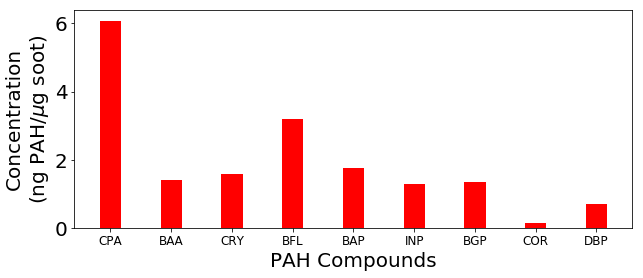

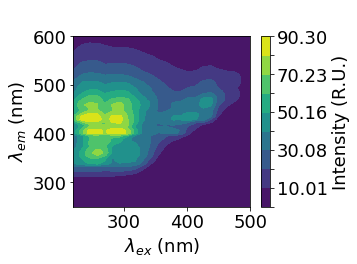

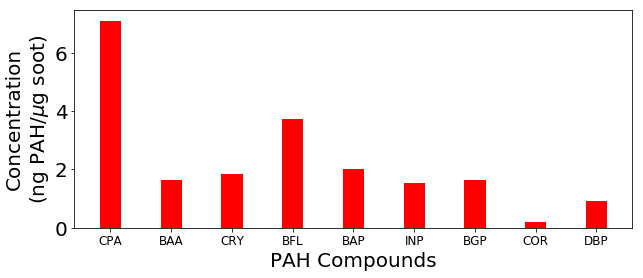

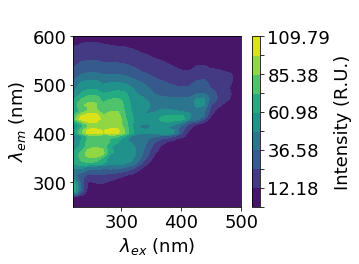

In [32]:
import matplotlib.ticker as ticker

def myfmt(x, pos):
    return '{0:.2f}'.format(x)

for i in range(2):
    f2 = plt.figure(figsize=(10,4))
    ax = f2.add_subplot(1,1,1)
    df2 = ax.bar(np.arange(9),Y_test_new[i][7:],0.35,color='red',label='Test Samples Original')
    ax.set_ylabel('Concentration\n(ng PAH/$\mu$g soot)',fontsize=20)
    ax.set_xlabel('PAH Compounds',fontsize=20)
    ax.set_xticks(np.arange(9))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xticklabels(lst[7:])
    ax.set_title('',fontsize=20)
    f2.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke Data Augmentation\\GCMSAugtest%s.png' %i,bbox_inches='tight')
    
    f5 = plt.figure(figsize=(4.8,3.6))
    levels=linspace(np.min(X_test_new[i]),np.max(X_test_new[i]),10)
    ax = f5.add_subplot(1,1,1)
    eem = X_test_new[i]
    cont = ax.contourf(Ex_new,Em_new,eem,levels)
    ax.set_xlim([220,500])
    ax.set_ylim([250,600])
    ttl = ax.set_title(" ",fontsize=20,
                       #fontweight='bold'
                     )
    ttl.set_position([0.55, 1.05])
    ax.set_ylabel('$\lambda_{em}$ (nm)',fontsize=18)
    ax.set_xlabel('$\lambda_{ex}$ (nm)',fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = f5.colorbar(cont, spacing='proportional',format=ticker.FuncFormatter(myfmt))
    cbar.ax.set_ylabel('Intensity (R.U.)',fontsize=18)
    cbar.ax.tick_params(axis='y',labelsize=18)
    for label in cbar.ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    plt.tight_layout(pad=0.4, w_pad=5, h_pad=5)
    f5.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke Data Augmentation\\EEMAugtest%s.png' %i,bbox_inches='tight')


In [33]:
X_train_new = np.append(X_train_new, X_train_down, axis=0)
X_test_new = np.append(X_test_new, X_test_down, axis=0)
Y_train_new = np.append(Y_train_new, Y_train, axis=0)
Y_test_new = np.append(Y_test_new, Y_test, axis=0)

In [34]:
X_test_new.shape

(150, 100, 33)

In [35]:
X_train_reshape = [np.shape(X_train_new)[0], 1, np.shape(X_train_new)[1], np.shape(X_train_new)[2]]
X_test_reshape = [np.shape(X_test_new)[0], 1, np.shape(X_test_new)[1], np.shape(X_test_new)[2]]
X_train_new = X_train_new.reshape(X_train_reshape)
X_test_new = X_test_new.reshape(X_test_reshape)

In [36]:

print(np.shape(X_train_new))
print(np.shape(X_test_new))
print(np.shape(Y_train_new))
print(np.shape(Y_test_new))

(600, 1, 100, 33)
(150, 1, 100, 33)
(600, 16)
(150, 16)


In [37]:
np.savetxt("xtrain.csv", np.reshape(X_train_new, (600, 3300)), delimiter=',')
np.savetxt("xtest.csv", np.reshape(X_test_new, (150, 3300)), delimiter=',')
np.savetxt("ytrain.csv", Y_train_new, delimiter=',')
np.savetxt("ytest.csv", Y_test_new, delimiter=',')